# APS 5 - Questões com auxílio do Pandas

** Nome: ** Ana Beatriz Bertolucci Henriques



APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [14]:
df.loc[(df.Latitude>0),'Hemisfério'] = 'Norte'
df.loc[(df.Latitude<0),"Hemisfério"]="Sul"




## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

[ 5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9. ]


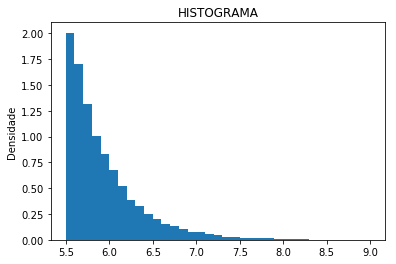

In [123]:
from numpy import arange
faixa=arange(5.5,9.1,0.1)
print(faixa)

plot = df.Magnitude.plot.hist(bins=faixa,normed=True,title='HISTOGRAMA')
plt.ylabel('Densidade')
plt.xlabel('')

As magnitudes que mais ocorrem estão entre as faixas 5.5 e 6. Isto é,conforme as magnitudes dos terremotos aumentam menor é a probabilidade de acontecer.

In [16]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

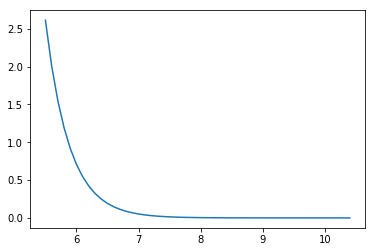

In [138]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var
import math
loc=5.5
scale=df["Magnitude"].mean()-5.5
n=len(df["Magnitude"])
X = expon.rvs(loc,scale,n)


x = np.arange(X.min(), X.max(), 0.1)
plt.plot(x, expon.pdf(x, loc, scale))




O loc na exponecial é o deslocamento do gráfico no eixo x e o scale é a média.

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

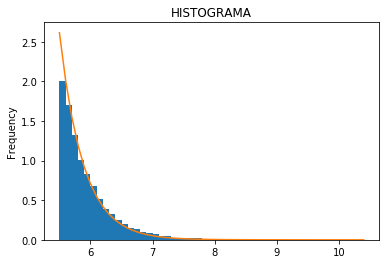

In [139]:
plot = df.Magnitude.plot.hist(bins=faixa,normed=True,title='HISTOGRAMA')
x = np.arange(X.min(), X.max(), 0.1)
plt.plot(x, expon.pdf(x, loc, scale))

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [45]:
pd.crosstab(df.Hemisfério, df.Type, normalize=True)

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447140,0.000085,0.006279,0.000000
Sul,0.545171,0.000085,0.001196,0.000043


In [89]:
ct=pd.crosstab(df.Hemisfério, df.Type, normalize=True)

### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [94]:
a=ct["Earthquake"].Norte+ct["Explosion"].Norte+ct["Nuclear Explosion"].Norte+ct["Rock Burst"].Norte
print(a)

0.453504762718


Explique o seu raciocínio

A probabilidade de ocorrer um terromoto será igual asoma das probabilidades de ocorrer cada um dos tipos de abalos no Norte que geram um terremoto.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [96]:
ct["Nuclear Explosion"].Norte

0.006279099568578873

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

A resposta foi obtida a partir do crosstab uma vez que as linhas são limitações do espaço amostral em norte e sul.As colunas por sua vez demostram as probabilidades de cada tipo de terremoto dada a condição norte  ou sul.

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

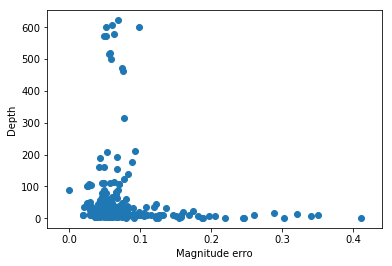

In [119]:

scatter_plot = plt.scatter(df['Magnitude Error'], df['Depth'], label="MXD")
plt.xlabel('Magnitude erro')
plt.ylabel("Depth")

plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [102]:
b=df.corr()
b["Magnitude Error"].Depth

-0.076918438923387164

Explique o que significa o valor da correlação calculada acima? 

A correlação é próxima de zero denotando que as variáveis não estão relacionadas, isto é, são independentes.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [111]:
df["Latitude"].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [112]:
df["Longitude"].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

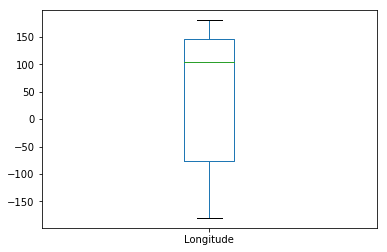

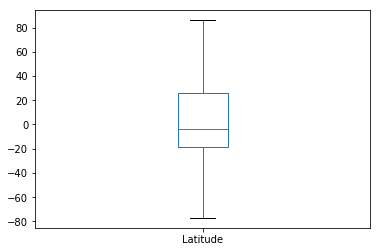

In [117]:
df['Longitude'].plot.box( )
plt.show()
df["Latitude"].plot.box( )
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


É mais provável que tenha sido no norte pois a maior probabilidade de ocorrer tremores esta no hemisferio norte, como se pode observar no gráfico boxplot da latitude, no qual uma parcela maior do valores se concentra acima da latitude zero ,isto é, em valores positivos.Além disso na tabela pode-se observar que a probabilidade de ocorrer terremotos do tipo Nuclear Explosion também é superior no norte.

In [145]:
ct2=pd.crosstab(df["Hemisfério"],df["Magnitude Type"],normalize=True)
pd.crosstab(df["Hemisfério"],df["Magnitude Type"],normalize=True)

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW
Hemisfério,,,,,,,,,,
Norte,0.071941,0.000256,0.000214,0.003289,0.032724,0.157382,0.047505,0.102059,0.000513,0.037551
Sul,0.088730,0.000000,0.000000,0.000000,0.039944,0.172505,0.057502,0.140123,0.000598,0.047163


In [151]:
print("Norte:")
print(ct2["MB"].Norte*ct["Nuclear Explosion"].Norte)

print("Sul:")
print(ct2["MB"].Sul*ct["Nuclear Explosion"].Sul)



Norte:
0.000451726062606
Sul:
0.000106123179735
